In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal as sig
from wettbewerb import load_references
import CNN_dataset

In [2]:
training_folder = "../shared_data/training_mini"
ids, channels, data, sampling_frequencies, reference_systems, eeg_labels = load_references(training_folder)

100	 Dateien wurden geladen.


In [3]:
CNN_dataset.create_cnn_dataset_map(ids, channels, data, sampling_frequencies, reference_systems, eeg_labels)


--- Subject 0 --- ID: aaaaaaac_s001_t000

--- Subject 1 --- ID: aaaaaaac_s001_t001

--- Subject 2 --- ID: aaaaaaac_s002_t000

--- Subject 3 --- ID: aaaaaaac_s004_t000

--- Subject 4 --- ID: aaaaaaac_s004_t002

--- Subject 5 --- ID: aaaaaaac_s005_t000

--- Subject 6 --- ID: aaaaaaac_s005_t001

--- Subject 7 --- ID: aaaaaaac_s005_t002

--- Subject 8 --- ID: aaaaaaac_s005_t003

--- Subject 9 --- ID: aaaaaaag_s004_t000

--- Subject 10 --- ID: aaaaaaag_s004_t001

--- Subject 11 --- ID: aaaaaaag_s004_t002

--- Subject 12 --- ID: aaaaaaag_s005_t000

--- Subject 13 --- ID: aaaaaaag_s006_t000

--- Subject 14 --- ID: aaaaaaag_s006_t001

--- Subject 15 --- ID: aaaaaaag_s006_t002

--- Subject 16 --- ID: aaaaaaar_s003_t000

--- Subject 17 --- ID: aaaaaaav_s001_t000

--- Subject 18 --- ID: aaaaaabg_s002_t000

--- Subject 19 --- ID: aaaaaacc_s004_t000

--- Subject 20 --- ID: aaaaaacz_s001_t001

--- Subject 21 --- ID: aaaaaacz_s003_t000

--- Subject 22 --- ID: aaaaaacz_s006_t000_1

--- Subject 23 ---

In [7]:
import torch 

dataset = torch.load("cnn_map_dataset.pt")
x, y = dataset[12]

print("Label:", y.item() if torch.is_tensor(y) else y)
print("Input shape:", x.shape)
print("Feature map:\n", x[0])

/home/jupyter-wki_team_3/wki-sose25/ipykernel_2166741/35724187.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load("cnn_map_dataset.pt")


Label: 0
Input shape: torch.Size([9, 5, 5])
Feature map:
 tensor([[ 0.0000,  0.2762,  0.0000,  1.4419,  0.0000],
        [-0.8646, -0.8117, -1.1831,  0.4557,  1.6136],
        [ 0.0884, -0.8061, -1.2332, -0.7635,  2.1049],
        [ 0.5451, -1.0279,  1.1207, -1.1267,  0.2870],
        [ 0.0000, -0.2409,  0.0000,  0.1240,  0.0000]])


/home/jupyter-wki_team_3/wki-sose25/ipykernel_2174676/475429947.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load(dataset_path)


Dataset geladen
Label distribution: Counter({0: 58870, 1: 57})
postiv 57, negative 57
Epoch 01 | Train Loss: 0.8984 | Train Acc: 0.5275 | Test Acc: 0.4783
Epoch 02 | Train Loss: 1.1651 | Train Acc: 0.5934 | Test Acc: 0.5652
Epoch 03 | Train Loss: 0.6528 | Train Acc: 0.5495 | Test Acc: 0.6957
Epoch 04 | Train Loss: 0.4762 | Train Acc: 0.8242 | Test Acc: 0.7391
Epoch 05 | Train Loss: 0.4150 | Train Acc: 0.8352 | Test Acc: 0.7826
Epoch 06 | Train Loss: 0.2537 | Train Acc: 0.9231 | Test Acc: 0.8696
Epoch 07 | Train Loss: 0.1804 | Train Acc: 0.9560 | Test Acc: 0.8696
Epoch 08 | Train Loss: 0.1034 | Train Acc: 0.9670 | Test Acc: 0.6957
Epoch 09 | Train Loss: 0.0404 | Train Acc: 0.9890 | Test Acc: 0.8696
Epoch 10 | Train Loss: 0.0353 | Train Acc: 0.9780 | Test Acc: 0.8696
Epoch 11 | Train Loss: 0.0152 | Train Acc: 1.0000 | Test Acc: 0.8696
Epoch 12 | Train Loss: 0.0022 | Train Acc: 1.0000 | Test Acc: 0.7826
Epoch 13 | Train Loss: 0.0144 | Train Acc: 0.9890 | Test Acc: 0.7826
Epoch 14 | Train 

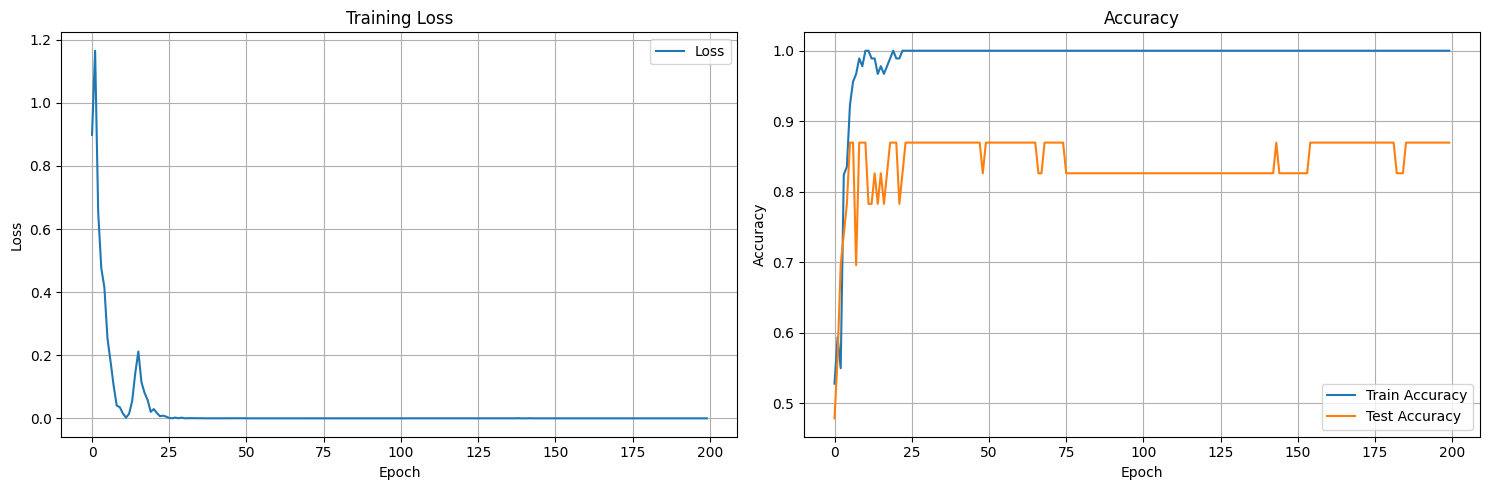

In [5]:
import random
import torch
import os
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt
from collections import Counter
dataset_path = "cnn_map_dataset.pt"
if not os.path.exists(dataset_path):
    raise FileNotFoundError("Run CNN_dataset.py, um Dataset zu erstellen")
    
dataset = torch.load(dataset_path)
print("Dataset geladen")
labels = [int(tens[1].item()) for tens in dataset]
print("Label distribution:", Counter(labels))

# durch Fensterung kommt es zu viel mehr negativen Samples
positive = [g for g in dataset if g[1].item() == 1]
negative = [g for g in dataset if g[1].item() == 0]

# Gleich viele negative wie positive behalten
negative = random.sample(negative, len(positive))
print(f"postiv {len(positive)}, negative {len(negative)}")
balanced_data = positive + negative
random.shuffle(balanced_data)

# Train Test split the Data 
train_size = int(0.8 * len(balanced_data))
test_size = len(balanced_data) - train_size
torch.manual_seed(42)
train_dataset, test_dataset = random_split(balanced_data, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size =32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size =32, shuffle = False)


import CNN_model

model = CNN_model.CNN_EEG(in_channels=9, n_classes=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)
loss_fn = torch.nn.CrossEntropyLoss()
num_epochs = 200
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = CNN_model.train_model(model, train_loader, optimizer, loss_fn)
    test_acc, _, _ = CNN_model.evaluate_model(model, test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch:02d} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

plt.figure(figsize=(15, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()